# **Exploração e Análise de dados de crédito com SQL e Python**

## 1\. Introdução

  Neste notebook analisaremos um dataset sobre informações de clientes de um banco, o objetivo será determinar 3 grupos distintos de clientes nos baseando em critérios como idade, sexo, renda e etc, e então escolher um grupo alvo para uma possível campanha de marketing, a escolha desse grupo será realizada com objetivo de obter maior lucro para o banco.

  ### 1.1\. Os Dados:

*   idade = idade do cliente
*   sexo = sexo do cliente (M ou F)
*   dependentes = número de dependentes
*   escolaridade = nível de escolaridade
*   salario_anual = faixa salarial
*   tipo_cartao = tipo de cartão do cliente
*   qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
*   iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
*   meses_inativo_12m = quantidade de meses que o cliente ficou inativo
*   limite_credito = limite de credito do cliente
*   valor_transacoes_12m = valor das transações dos ultimos 12 meses
*   qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses





A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

## 2\. Exploração de dados

O primeiro passo é entender os dados fornecidos no dataset, vamos a epxloração:

**Tipos de cada dado:**

```sql
DESCRIBE credito;
```

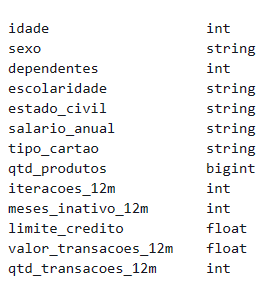

**Média, mínima e máxima da coluna idade por sexo:**

```sql
SELECT avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade,sexo FROM credito group by sexo
```

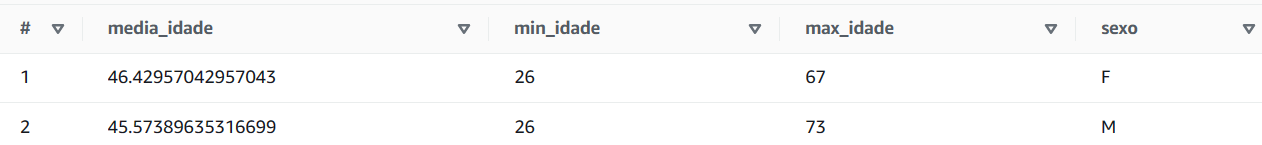

**Quais os tipos de salários anuais disponíveis em nosso dataset?**

```sql
SELECT DISTINCT salario_anual FROM default.credito;
```

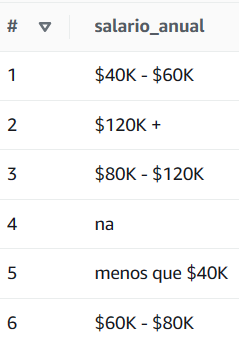

**Quais os tipos de cartões disponíveis no dataset e qual o mais utilizado?**

```sql
SELECT tipo_cartao, COUNT(*)
FROM credito
group by tipo_cartao;
```

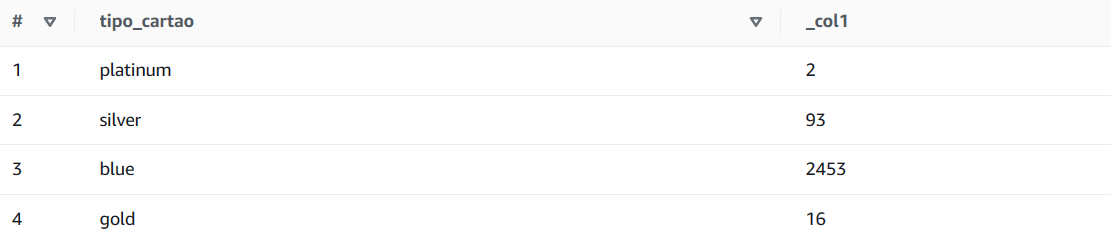

## 3\. Tratamento dos dados

Nesta etapa utilizaremos python para realizar a limpeza e ordenação dos dados, dividiremos o dataset em 3 grupos diferentes nos baseando na idade e então escolheremos o grupo com maior poder aquisitivo para que a campanha de marketing traga o maior retorno possível.

### 3.1\. Bibliotecas e arquivos

In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget -q 'https://raw.githubusercontent.com/MateusGCS/Projeto-sql-credito/main/credito.csv' -O credito.csv

### 3.2\. Limpeza e Segregação dos dados

In [40]:
data = pd.read_csv('credito.csv')
data.shape

(2564, 13)

In [49]:
data.replace('na', np.nan, inplace=True)
data.dropna(inplace=True)
data.shape

(1926, 13)

Por falta de tratamento anterior este dataframe contava com alguns dados nulos, estes dados constavam em formato 'str' e não 'NaN', então foi necessário realizar a conversão do formato string para o np.nan, após a remoção dos dados nulos nosso novo dataframe passa de 2564 para 1926 entradas.

In [70]:
grupo1 = pd.DataFrame(columns=data.columns)
grupo2 = pd.DataFrame(columns=data.columns)
grupo3 = pd.DataFrame(columns=data.columns)

for index, row in data.iterrows():
  if row['idade'] <= 41:
    grupo1 = pd.concat([grupo1, row.to_frame().T], ignore_index=True)
  elif row['idade'] <= 56:
    grupo2 = pd.concat([grupo2, row.to_frame().T], ignore_index=True)
  elif row['idade'] <= 73:
    grupo3 = pd.concat([grupo3, row.to_frame().T], ignore_index=True)

grupo3.head()

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,57,F,2,mestrado,casado,menos que $40K,blue,5,2,2,2436.0,1570.23,29
1,61,M,1,ensino medio,casado,$40K - $60K,blue,2,3,2,3193.51,1336.54,30
2,62,F,0,mestrado,casado,menos que $40K,blue,2,3,3,1438.73,692.25,16
3,58,M,0,mestrado,casado,$80K - $120K,blue,6,2,2,12555.16,1291.68,24
4,59,M,1,doutorado,casado,$40K - $60K,blue,3,2,2,2548.58,1719.18,27


### 3.3\. Análise

In [71]:
new_df = {'df1': grupo1, 'df2': grupo2, 'df3': grupo3}

mean_df = pd.DataFrame({
    'Idade 26 - 41': new_df['df1']['valor_transacoes_12m'].mean().round(2),
    'Idade 42 - 56': new_df['df2']['valor_transacoes_12m'].mean().round(2),
    'Idade 57 - 73': new_df['df3']['valor_transacoes_12m'].mean().round(2)
}, index=[0])

mean_df.head()

,Idade 26 - 41,Idade 42 - 56,Idade 57 - 73
0,2074.71,1678.01,1612.0


In [72]:
sum_df = pd.DataFrame({
    'Idade 26 - 41': round(new_df['df1']['valor_transacoes_12m'].sum(), 2),
    'Idade 42 - 56': round(new_df['df2']['valor_transacoes_12m'].sum(), 2),
    'Idade 57 - 73': round(new_df['df3']['valor_transacoes_12m'].sum(), 2)
}, index=[0])

sum_df.head()

,Idade 26 - 41,Idade 42 - 56,Idade 57 - 73
0,1473042.01,1540413.08,480374.76


Após realizar a divisão do dataframe nos baseando em grupos etários temos a média e total de gastos dentro de 12 meses para cada grupo, no primeiro grupo temos uma média de gastos por cliente maior que os demais, entretanto no segundo grupo o total gasto nesses 12 meses foi maior. Escolheremos então o segundo grupo por ter o maior poder aquisitivo no período de tempo demonstrado, vale notar que a segunda faixa etária é o grupo com maior número de clientes, o que influcenciou diretamente na escolha final.

## 4\. Visualização

Agora iremos gerar algumas visualizações que podem possívelmente auxiliar onde devemos focar nossa campanha de marketing.

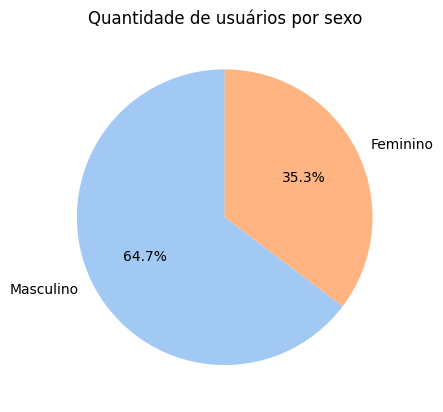

In [91]:
counts = grupo2['sexo'].value_counts()
colors = sns.color_palette('pastel')[0:5]
labels= ['Masculino', 'Feminino']

plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Quantidade de usuários por sexo')
plt.show()

blue      867
silver     46
gold        5
Name: tipo_cartao, dtype: int64


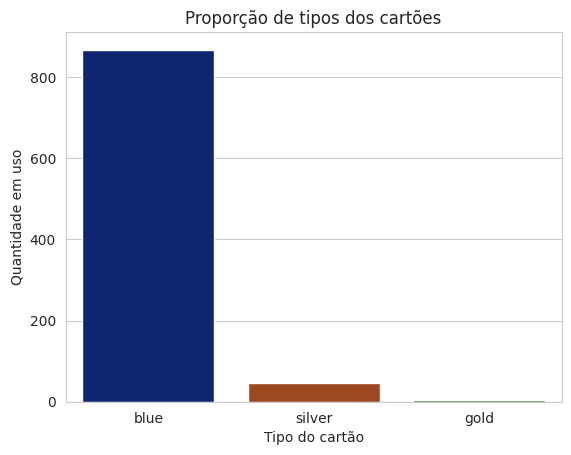

In [107]:
#visualização dos tipos de cartões mais usados dentro do grupo
counts = grupo2['tipo_cartao'].value_counts()
print(counts)
df_count = counts.reset_index().rename(columns={'index': 'tipo de cartao', 'tipo_cartao': 'quantidade'})
df_count.head()

with sns.axes_style('whitegrid'):
  grafico = sns.barplot(data=df_count, x='tipo de cartao', y='quantidade', errorbar=None, palette='dark')
  grafico.set(title='Proporção de tipos dos cartões', xlabel='Tipo do cartão', ylabel='Quantidade em uso');

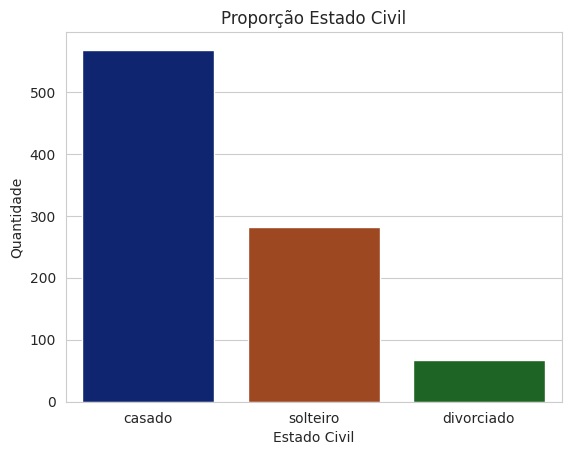

In [111]:
counts = grupo2['estado_civil'].value_counts()
df_count = counts.reset_index().rename(columns={'index': 'Estado Civil', 'estado_civil': 'Quantidade'})
df_count.head()

with sns.axes_style('whitegrid'):
  grafico = sns.barplot(data=df_count, x='Estado Civil', y='Quantidade', errorbar=None, palette='dark')
  grafico.set(title='Proporção Estado Civil', xlabel='Estado Civil', ylabel='Quantidade');

## 5\. Conclusão

Após a exploração, tratamento e visualização dos dados, podemos extrair algumas análises interessantes:


*   O grupo etário escolhido como público alvo para o marketing tem idade entre 42 e 56 anos, este é o grupo com maior poder aquisitivo.

*   O grupo mais jovem com idade entre 26 e 41 anos tem na média um valor individual de gastos maior.

*   O grupo escolhido tem um público masculino maior, sendo uma proporção de 64,7% homens e 35,3% mulheres.

*   O grupo escolhido é composto em sua maior parte por cartões do tipo blue, sendo 867 tipo blue, 46 silver e apenas 5 gold.

*   Observamos também que a maior parte dos clientes são casados.






Com base nos insights obtidos, podemos desenvolver estratégias de marketing eficazes. Como a maioria dos clientes possui o cartão blue, uma promoção que incentive os clientes a obterem a classificação silver ou gold pode ser uma opção viável. Além disso, a maior parte do público é do sexo masculino e a maioria dos clientes é casada. Se a estratégia fosse voltada para uma data específica, como o Dia Internacional da Mulher, por exemplo, poderíamos esperar um bom retorno, considerando a compra de presentes e outros itens relacionados.